**Directions:** The exam is open book. You may consult your lecture notes and other course materials such as your textbook, completed labs and homework problems. However, if you are found to be submitting the work of other students as your exam submission, an honor code violation will be reported. This could be by communication with others and the sharing of answers and code: during the exam time, with students in other sections of the course, by using the solutions to exams from previous semesters, or online answer tools such as Chegg, CourseHero, ChatGPT, etc. There is a zero tolerance policy and all suspected honor code violations will be reported. 

Just as with all course assignments, you should submit this exam to Gradescope as a Jupyter Notebook with the ipynb file extension. To receive full credit, you should show and run all of your code used to answer each question.

**Check your file on Gradescope to ensure that it is the file that you intended to submit! No completed work ill be accepted after the due date and time.**

Run the cell below to set up the notebook.

In [3]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
from scipy import stats


# User car Dealership

(What model was your first car?)

As of August 2004, a large Toyota car dealership offers purchasers of new Toyota cars the option to buy their used car as part of a trade-in. The dealer then sells the used cars for a small profit. The `ToyotaCorolla.csv` data set includes the sales price(in EUROs) and other information on the used cars, such as its age, mileage, fuel type, and engine size. The total number of records in the dataset is 718, which is the count of Toyota cars in the inventory.

A description of each of these variables is provided below.

Variables              | Descriptions
---------------------- | -----------------------------------------------------
_Price_                | Offer Price in EUROs
_Age_08_04_            | Age in months as in August 2004
_Mfg_Year_             | Year of Manufacture of the car
_KM_                   | Accumulated Kilometers on odometer
_Automatic_            | Automatic ( (Yes=1, No=0)
_Boardcomputer_        | Boardcomputer (Yes=1, No=0)
_Sport_Model_          | Sport Model  (Yes=1, No=0)
_Cylinders_            | Number of cylinders
_Central_Lock_         | Central Lock  (Yes=1, No=0)
_Power_Steering_       | Power Steering  (Yes=1, No=0)
_Weight_               | Weight in Kilograms
_Parking_Assistant_    | Parking assistance system  (Yes=1, No=0)
_ABS_                  | Anti-Lock Brake System (Yes=1, No=0)
_Fuel_Type_            | Fuel Type (Petrol, Diesel, CNG)

In [4]:
# Run this cell to load the data set and select only the variables of interest.

toyota = Table.read_table('ToyotaCorolla.csv').select(
    ['Price', 'Age_08_04', 'Mfg_Year', 'KM', 'Automatic',
    'Boardcomputer', 'Sport_Model', 'Cylinders',
    'Central_Lock', 'Power_Steering', 'Weight', 'Parking_Assistant',
    'Weight','Parking_Assistant', 'ABS', 'Fuel_Type'])
toyota.take(np.arange(5))

Price,Age_08_04,Mfg_Year,KM,Automatic,Boardcomputer,Sport_Model,Cylinders,Central_Lock,Power_Steering,Weight,Parking_Assistant,ABS,Fuel_Type
13750,23,2002,72937,0,1,0,4,1,1,1165,0,1,Diesel
14950,26,2002,48000,0,1,0,4,0,1,1165,0,1,Diesel
12950,32,2002,61000,0,1,0,4,1,1,1170,0,1,Diesel
18600,30,2002,75889,0,1,0,4,1,1,1245,0,1,Diesel
12950,23,2002,71138,0,1,0,4,0,1,1105,0,1,Diesel


## Question 1

As of August 2004, a customer is interested in purchasing a used toyota car at the dealership. She would like to know the price of the newest, sport-model car(based on the age of the cars as at August 2004) on the lot with less than 3500 kilometers and 4 cylinders. 

Using your data manipulation/querying skills, assign `newest_price` to the price of the newest, sport-model car(based on the age of the cars as at August 2004) on the lot with less than 3500 kilometers and 4 cylinders. 

In [31]:
newest_price = (toyota.where("Sport_Model", are.equal_to(1)).where("KM", are.below(3500)).where("Cylinders", are.equal_to(4)).sort("Age_08_04")).column("Price").item(0)

# Do not change the code below:
newest_price

21500

## Question 2

The customer described in question 1 has heard that most used cars are sometimes priced based on the extent of usage by the pervious car owner(s), which is refelected by the level of accummulated mileage(measured in KM in this data set). Could this be true?

As a budding data scientist, select the right variable(s) and provide an appropriate plot that helps to answer this question(based on the nature of the variables selected). If there are any patterns, briefly describe in your own words what your response would be to the famed customer.

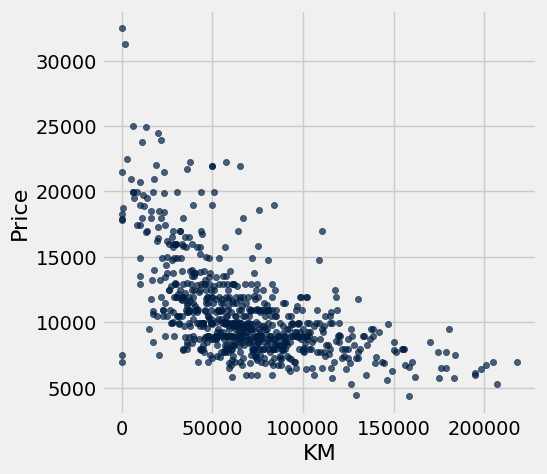

In [52]:
toyota.scatter("KM", "Price")

From the graph we can observe a negative linear correlation between the level of accumulated mileage and the price of the car, so the famed customer's information is probably correct.

## Question 3

The customer referenced in the earlier questions has made a decision: She cannot afford to spend as high as the amount computed in question 1. Consequently, she wants to know the size of her options if she decided to buy any used automatic car in the lot, priced anywhere from $\$10,000$ to under $\$16,000$, only uses petrol as the fuel type, and has no parking assistant feature.

Given the criteria described above, how limited are her options? Find the proportion of all used cars in the lot that she may consider buying. Assign this proportion to `her_options_prop`

In [50]:
her_options_prop = (toyota.where("Price", are.between(10000, 16000)).where("Automatic", are.equal_to(1)).where("Fuel_Type", are.equal_to("Petrol")).where("Parking_Assistant", are.equal_to(0))).num_rows / toyota.num_rows

# Do not change the code below!
her_options_prop

0.016713091922005572

## Question 4

Cox Automotive Chief Economist Jonathan Smoke says 2024 will be the best year for consumers to buy a new car since before the pandemic, as new vehicle supply increases, transaction prices come down, automakers are expected to offer more deals and interest rates should ease. Supply issues for manufacturers, increased prices of vehicle parts, and higher production parts are some of the factors that contributes to setting car prices.

Is there any evidence in this data that indicates/refutes the claim that _**the more recent a car is, the more expensive the car is on average?**_

To use data to check this claim,

- produce a summary table of each Year of Manufacture by the average prices of cars in the lot.
- provide an appropriate plot to visualize the average prices(in descending order of magnitude) for each year.
- give a bre

In [8]:
# Summary table
Mfg_avgprice = toyota.select("Mfg_Year", "Price").group("Mfg_Year", np.average)
Mfg_avgprice


Mfg_Year,Price average
1998,7845.64
1999,9341.7
2000,10926.6
2001,12355.1
2002,16695.2
2003,18882.8
2004,22704.6


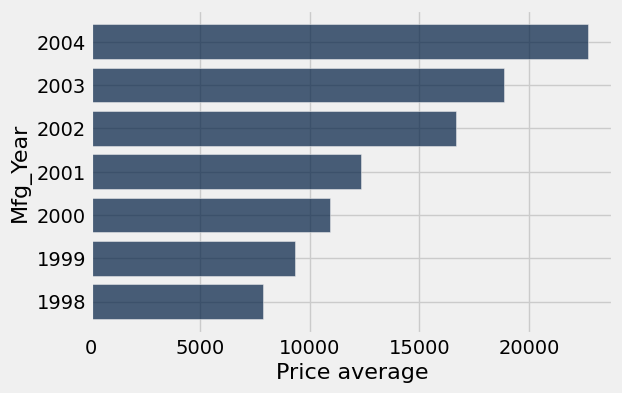

In [9]:
# An 'appropriate' plot of the summary table

Mfg_avgprice.sort("Price average", descending= True).barh("Mfg_Year")

In [10]:
# Provide a brief explanation of how the table and plot you have provided answers the business question.

From the plot, which is made by processed data from the table in descending orders of average prices, we can see a positive linear correlation between the year of manufactoring and the average price of the car. The correlation supports the claim that the more recent a car is, the more expensive the car is on average.

## Question 5

A customer is interested in purchasing a used car at the dealership but is unsure of how much she should plan to spend on the purchase on average. On arrival at the dealership, she asks the the manager at the dealership: "Based on the data you have on used cars in the inventory, what is the typical price of a used car in your lot?". Using the data above, a statistical analyst is interested in generating a suitable plot of the distribution of the prices in the data.

- Plot a histogram of the `Price` of all cars in the data set. Use the `toyota_bins` provided below. Then describe the shape of the histogram.
- Then describe the shape of the histogram.

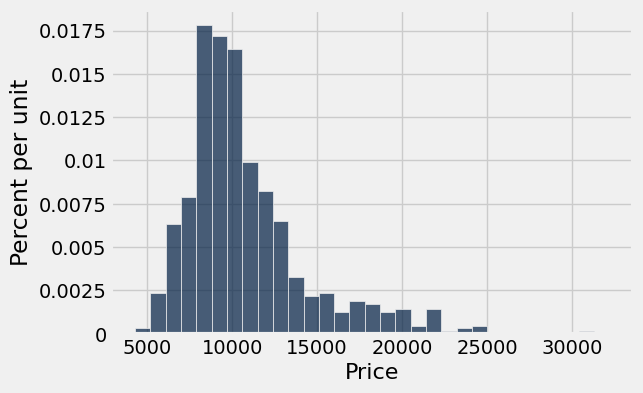

In [11]:
toyota_bins = np.arange(4300, 33000, 900)

toyota.hist("Price", bins = toyota_bins)

The histogram is right skewed. It shows the price distribution of cars derived from the collected data.

## Question 6

Let's go back to the year 2004. 

(6a): Construct a new table `toyota_age_in_years_2004` that contains all of the rows and columns from `toyota` and a new column named `age_in_years`. The values for `age_in_years` should be how old(an integer) each car in the lot is(in years) from the year of manufacture. For example, a car whose year of manufacture is 2004 should have 0 has its value under this new column. 


In [12]:
toyota_age_in_years_2004 = toyota.with_column("age_in_years", 2004 - toyota.column("Mfg_Year"))
toyota_age_in_years_2004

Price,Age_08_04,Mfg_Year,KM,Automatic,Boardcomputer,Sport_Model,Cylinders,Central_Lock,Power_Steering,Weight,Parking_Assistant,ABS,Fuel_Type,age_in_years
13750,23,2002,72937,0,1,0,4,1,1,1165,0,1,Diesel,2
14950,26,2002,48000,0,1,0,4,0,1,1165,0,1,Diesel,2
12950,32,2002,61000,0,1,0,4,1,1,1170,0,1,Diesel,2
18600,30,2002,75889,0,1,0,4,1,1,1245,0,1,Diesel,2
12950,23,2002,71138,0,1,0,4,0,1,1105,0,1,Diesel,2
19950,22,2002,43610,0,1,1,4,1,1,1185,0,1,Petrol,2
21500,31,2002,23000,0,1,1,4,1,1,1185,0,1,Petrol,2
22000,28,2002,18739,0,1,1,4,1,1,1185,0,1,Petrol,2
17950,24,2002,21716,0,0,0,4,1,1,1105,0,1,Petrol,2
16950,30,2002,64359,0,1,1,4,1,1,1105,0,1,Petrol,2


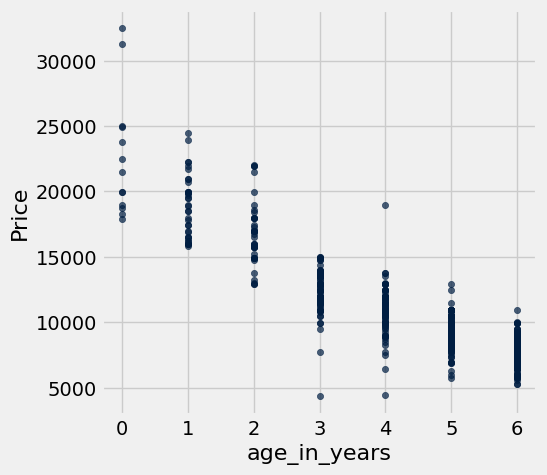

In [13]:


# Do not change the code below this line!
toyota_age_in_years_2004.scatter('age_in_years','Price')

_(6b): The plot generated in 6(a) also supports the claim discussed in question 4: the more recent a car is, the more expensive the car is on average. From the plot, a negative linear correlation between the age of the cars in years and the price of the car. In other words, the smaller the age of the cars, the greater the prices, vice versa. This relationship supports the claim stated in question 5.

## Question 7

Construct a line plot of average prices of cars in the lot against their ages as at August 2004. On the same plot, you should 
- have a line plot of average mileage for the cars(KM) against their ages as at August 2004. 
- add an approprite title to the plot.
- add two horizontal lines to the plot(in different colors). One should be for the overall average price and the other should be for the overall average KM.

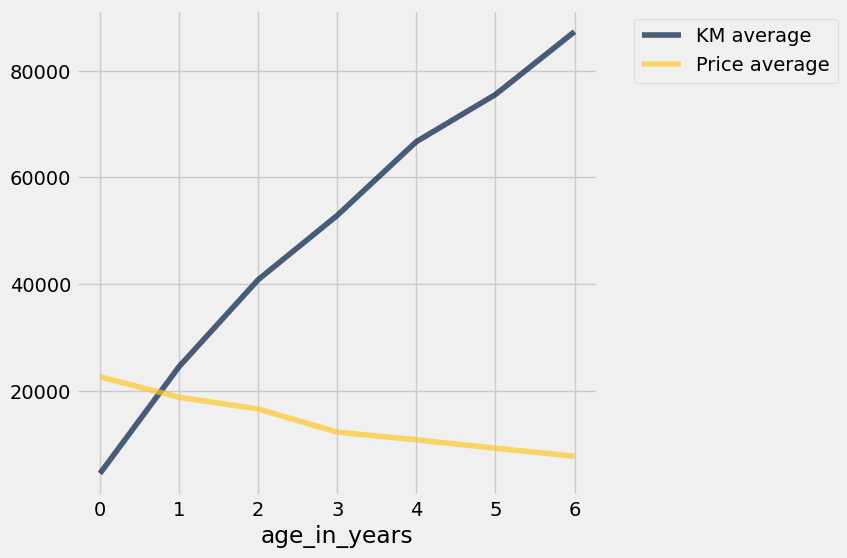

In [26]:
toyota_age_in_years_2004.select("age_in_years", "KM", "Price").group("age_in_years", np.average).plot("age_in_years")

Text(0.5, 1.0, 'The Graph of Average Accumulated Mileage and Average Price Against Age of Cars in Years')

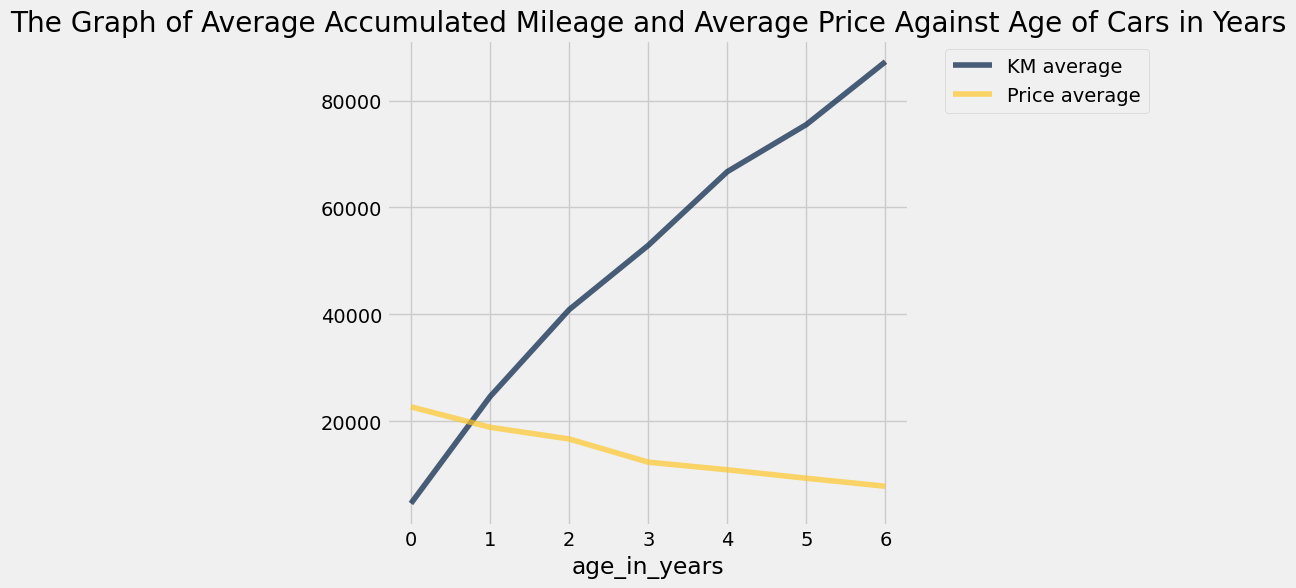

In [27]:
toyota_age_in_years_2004.select("age_in_years", "KM", "Price").group("age_in_years", np.average).plot("age_in_years")
plots.title("The Graph of Average Accumulated Mileage and Average Price Against Age of Cars in Years")

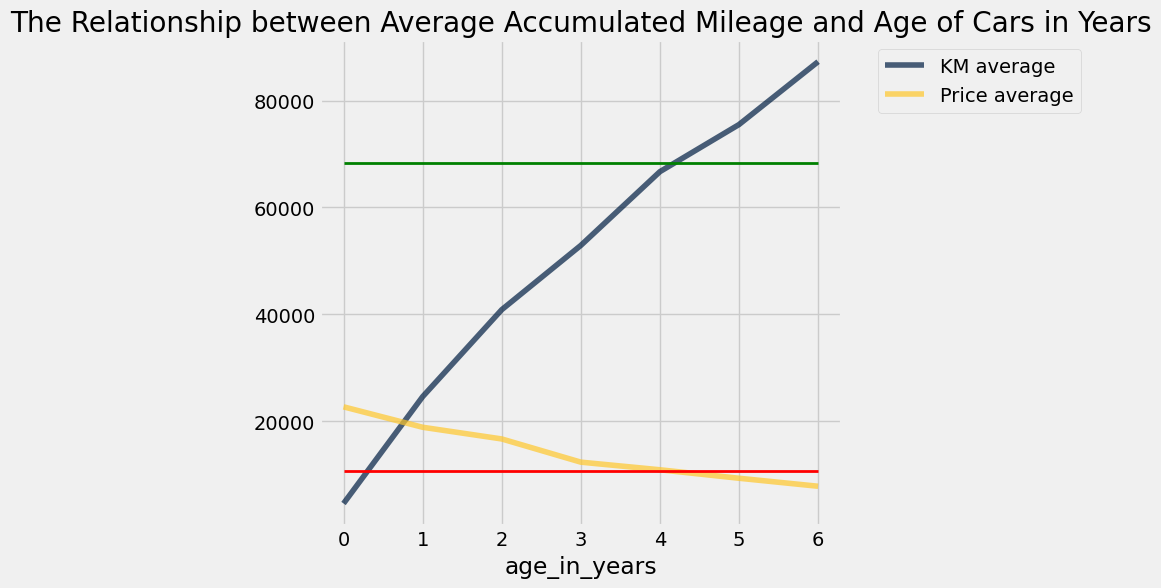

In [29]:

toyota_age_in_years_2004.select("age_in_years", "KM", "Price").group("age_in_years", np.average).plot("age_in_years")
plots.title("The Relationship between Average Accumulated Mileage and Age of Cars in Years")
a = np.average(toyota.column("Price"))
b = np.average(toyota.column("KM"))
plots.plot([0, 6], [a, a], color = "red", lw = 2)
plots.plot([0, 6], [b, b], color = "green", lw = 2)


## Question 8

Do all sports Model Toyota cars manufactured in 2004 that use Petrol as their fuel type in this data set average more kilometers compared to the average kilometers in 2024 for cars that use other types of fuel combined?

Assign `Petrol_KM_2004` to the average kilometers(KM) of all sports Model Toyota cars manufactured in 2004 that use Petrol as their fuel type.

Assign `Not_Petrol_KM_2004` to the average kilometers(KM) of all combined sports Model Toyota cars manufactured in 2004 that do not use Petrol as their fuel type.

In [17]:
Petrol_KM_2004 = np.average(toyota.where("Sport_Model", are.equal_to(1)).where("Mfg_Year", are.equal_to(2004)).where("Fuel_Type", are.equal_to("Petrol")).column("KM"))
Not_Petrol_KM_2004 = np.average(toyota.where("Sport_Model", are.equal_to(1)).where("Mfg_Year", are.equal_to(2004)).where("Fuel_Type", are.not_equal_to("Petrol")).column("KM"))

# Do not change the code below this line
Petrol_KM_2004, Not_Petrol_KM_2004

(3808.0, 2500.3333333333335)

## Question 9

Construct a function `average_price_year` that has the following arguments: `mfg_year`, `fuel_type`, `price_min`, `price_max`, `min_km`, and `max_km`. For a given `mfg_year` and `fuel_type`, the function should return two numbers: **the percentage(as a decimal)** and the **average price** of all cars whose prices are as low as the `price_min`, but up to the `price_max` and whose KM are as low as the `min_km`, but up to the `max_km`.

In [18]:
def average_price_year(mfg_year, fuel_type, price_min, price_max, min_km, max_km):
    """Returns the percentage and the average price of all cars whose prices and km are within the given range."""
    percent = (toyota.where("Mfg_Year", are.equal_to(mfg_year)).where("Fuel_Type", are.equal_to(fuel_type)).where("KM", are.between(min_km, max_km)).where("Price", are.between(price_min, price_max))).num_rows / toyota.num_rows
    avgprice = np.average((toyota.where("Mfg_Year", are.equal_to(mfg_year)).where("Fuel_Type", are.equal_to(fuel_type)).where("KM", are.between(min_km, max_km)).where("Price", are.between(price_min, price_max))).column("Price"))

    return percent, avgprice

# Do not change the code below this line
average_price_year(2002, 'Petrol', 15000, 25000, 30000, 60000)

(0.019498607242339833, 17014.214285714286)

## Question 10

(10a) Create an appropriate summary table of the maximum mileage(KM) based on _the combination of the manufacturing years of all cars and the different fuel types._

In [19]:
Fuel_Mfg_Max_KM = toyota.pivot("Fuel_Type", "Mfg_Year", values = "KM", collect= np.max)
Fuel_Mfg_Max_KM

Mfg_Year,CNG,Diesel,Petrol
1998,207114,218118,176000
1999,43000,205000,194545
2000,150000,198167,146736
2001,178858,180638,118217
2002,0,110404,75048
2003,0,66966,39115
2004,0,13253,11000


(10a) Create an appropriate plot of summary table of the maximum mileage(KM) based on _the combination of the manufacturing years of all cars and the different fuel types._

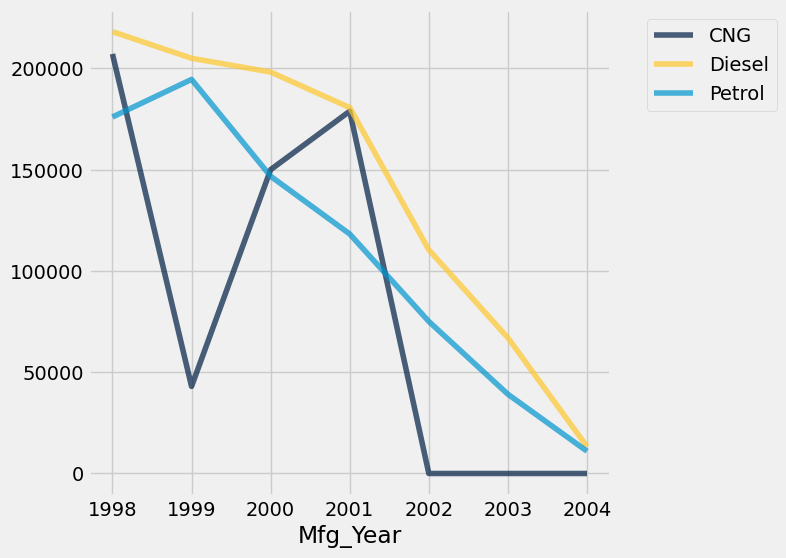

In [21]:
Fuel_Mfg_Max_KM.plot("Mfg_Year")